In [142]:
import scanpy as sc
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
import spin

In [2]:
basepath = '/stanley/WangLab/kamal/code/remote_notebooks/spin_tests/figures/'
dpi = 300

In [25]:
# Get nbrs
def get_nbrs(adata, n_nbrs, spatial_key):
    coordinates = adata.obsm[spatial_key]
    nbrs = NearestNeighbors(n_neighbors=n_nbrs)
    nbrs.fit(coordinates)
    _, nbr_idxs = nbrs.kneighbors(coordinates)
    adata.obsm['nbr_idxs'] = nbr_idxs
    adata.uns['n_nbrs'] = n_nbrs
    adata.uns['spatial_key'] = spatial_key

# Smooth
def smooth(adata):
    X_smooth = np.zeros(adata.X.shape)
    for nth_nbrs in np.array(adata.obsm['nbr_idxs']).T:
        X_smooth += adata.X[nth_nbrs] / adata.uns['n_nbrs']
    adata.layers['smooth'] = X_smooth

# PCA on smooth features
def pca(adata, pca_key='X_pca', n_pcs=50, svd_solver='randomized', random_state=0):
    pca = PCA(n_components=n_pcs, svd_solver=svd_solver, random_state=random_state)
    adata.obsm[pca_key] = pca.fit_transform(adata.layers['smooth'])
    adata.varm[pca_key] = pca.components_.T

# Mouse

In [34]:
adata = sc.read_h5ad('/stanley/WangLab/kamal/data/spin_tests/single.h5ad')

## 50 PCs

Already done in main text

## 25 PCs

In [89]:
n_nbrs = 30
get_nbrs(adata, n_nbrs, 'spatial')
smooth(adata)

pca(adata, n_pcs=25)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, key_added='region', resolution=0.2)
sc.tl.umap(adata)

In [90]:
adata.obs['region']

index
359677    16
359681    16
359682    16
359683    16
359684    16
          ..
404552    20
404553    20
404555    20
404557    20
404558    20
Name: region, Length: 37928, dtype: category
Categories (26, object): ['0', '1', '2', '3', ..., '22', '23', '24', '25']

In [92]:
sc.tl.leiden(adata, key_added='region', resolution=0.16)
adata.obs['region']

index
359677    16
359681    16
359682    16
359683    16
359684    16
          ..
404552    12
404553    12
404555    12
404557    12
404558    12
Name: region, Length: 37928, dtype: category
Categories (23, object): ['0', '1', '2', '3', ..., '19', '20', '21', '22']

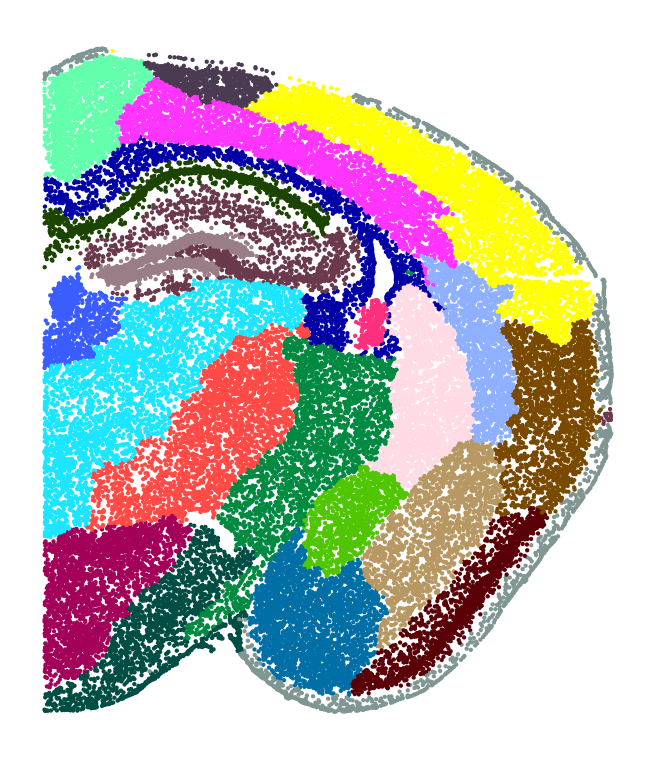

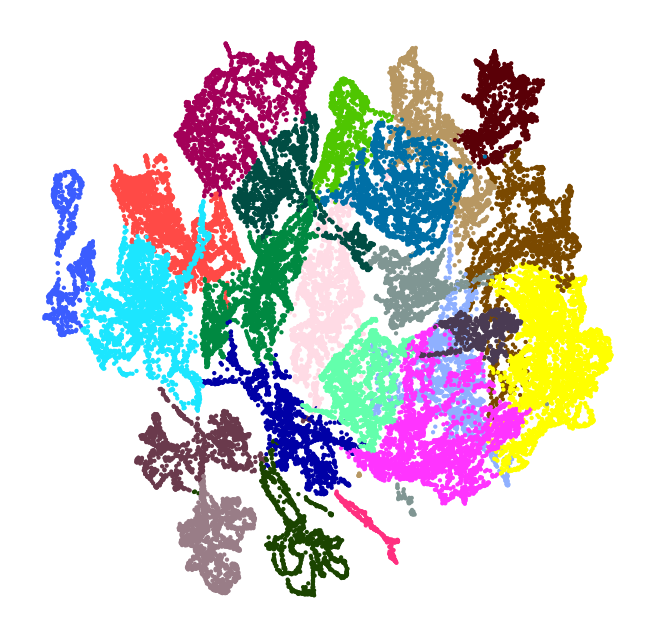

In [93]:
sc.set_figure_params(figsize=(5,6))
sc.pl.embedding(adata, basis='spatial', color='region', s=15, palette=sc.pl.palettes.default_102, legend_loc=None, return_fig=True, title='')
plt.axis('off')
figname = f'tissue_spin_leiden_25pcs.png'
savepath = os.path.join(basepath, figname)
plt.savefig(savepath, bbox_inches='tight', transparent=True, dpi=dpi)

sc.set_figure_params(figsize=(5,5))
sc.pl.embedding(adata, basis='X_umap', color='region', s=15, palette=sc.pl.palettes.default_102, legend_loc=None, return_fig=True, title='')
plt.axis('off')
figname = f'umap_spin_leiden_25pcs.png'
savepath = os.path.join(basepath, figname)
plt.savefig(savepath, bbox_inches='tight', transparent=True, dpi=dpi)

## 10 PCs

In [94]:
n_nbrs = 30
get_nbrs(adata, n_nbrs, 'spatial')
smooth(adata)

pca(adata, n_pcs=10)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, key_added='region', resolution=0.2)
sc.tl.umap(adata)

In [95]:
adata.obs['region']

index
359677    14
359681    14
359682    14
359683    14
359684    14
          ..
404552     8
404553     8
404555     8
404557     8
404558     8
Name: region, Length: 37928, dtype: category
Categories (24, object): ['0', '1', '2', '3', ..., '20', '21', '22', '23']

In [96]:
sc.tl.leiden(adata, key_added='region', resolution=0.19)
adata.obs['region']

index
359677    13
359681    13
359682    13
359683    13
359684    13
          ..
404552     1
404553     1
404555     1
404557     1
404558     1
Name: region, Length: 37928, dtype: category
Categories (23, object): ['0', '1', '2', '3', ..., '19', '20', '21', '22']

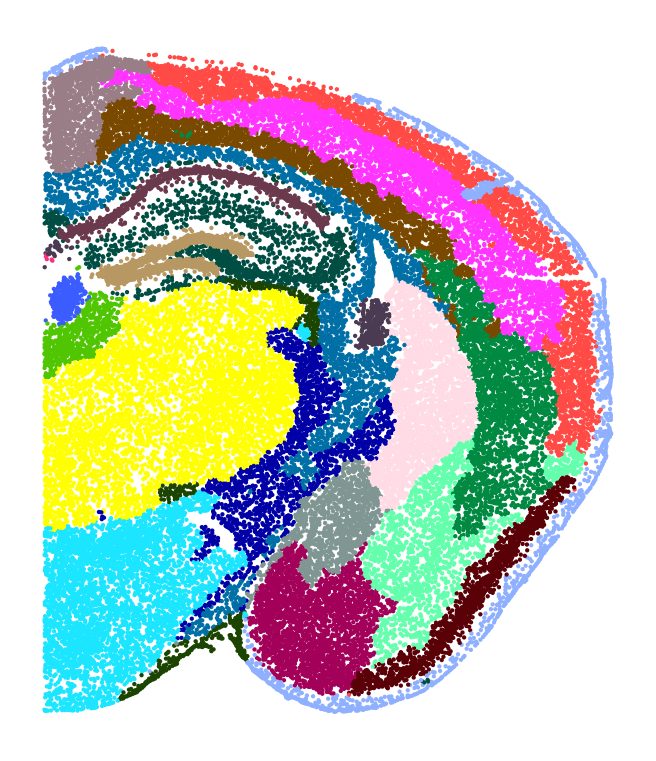

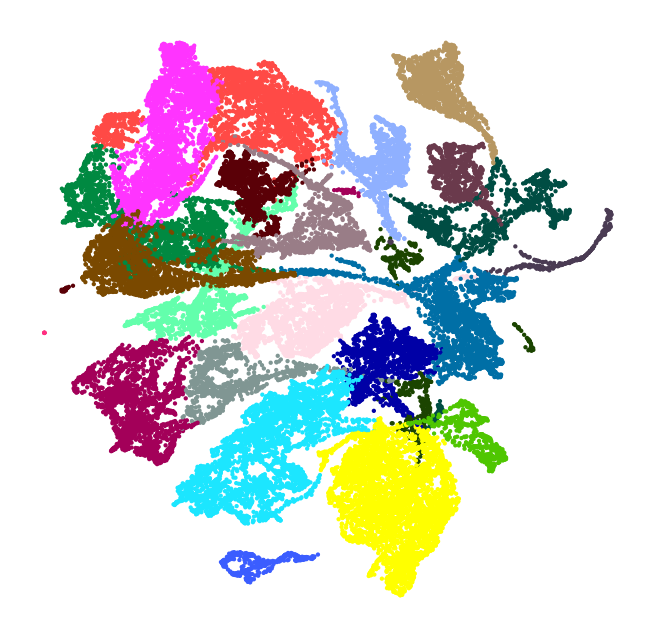

In [97]:
sc.set_figure_params(figsize=(5,6))
sc.pl.embedding(adata, basis='spatial', color='region', s=15, palette=sc.pl.palettes.default_102, legend_loc=None, return_fig=True, title='')
plt.axis('off')
figname = f'tissue_spin_leiden_10pcs.png'
savepath = os.path.join(basepath, figname)
plt.savefig(savepath, bbox_inches='tight', transparent=True, dpi=dpi)

sc.set_figure_params(figsize=(5,5))
sc.pl.embedding(adata, basis='X_umap', color='region', s=15, palette=sc.pl.palettes.default_102, legend_loc=None, return_fig=True, title='')
plt.axis('off')
figname = f'umap_spin_leiden_10pcs.png'
savepath = os.path.join(basepath, figname)
plt.savefig(savepath, bbox_inches='tight', transparent=True, dpi=dpi)

# Marmoset

In [123]:
adata = sc.read_h5ad('/stanley/WangLab/kamal/data/spin_tests/xspecies.h5ad')
adata = adata[adata.obs['dataset']=='marmoset']

## 50 PCs

In [124]:
n_nbrs = 30
get_nbrs(adata, n_nbrs, 'spatial')
smooth(adata)

pca(adata, n_pcs=50)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, key_added='region', resolution=0.2)
sc.tl.umap(adata)

In [125]:
adata.obs['region']

0-marmoset         6
1-marmoset         6
2-marmoset         6
3-marmoset         6
4-marmoset         6
                  ..
42452-marmoset    11
42453-marmoset    11
42454-marmoset    23
42456-marmoset    23
42457-marmoset    11
Name: region, Length: 37717, dtype: category
Categories (27, object): ['0', '1', '2', '3', ..., '23', '24', '25', '26']

In [128]:
sc.tl.leiden(adata, key_added='region', resolution=0.04)
adata.obs['region']

0-marmoset        3
1-marmoset        3
2-marmoset        3
3-marmoset        3
4-marmoset        3
                 ..
42452-marmoset    0
42453-marmoset    0
42454-marmoset    1
42456-marmoset    1
42457-marmoset    0
Name: region, Length: 37717, dtype: category
Categories (9, object): ['0', '1', '2', '3', ..., '5', '6', '7', '8']

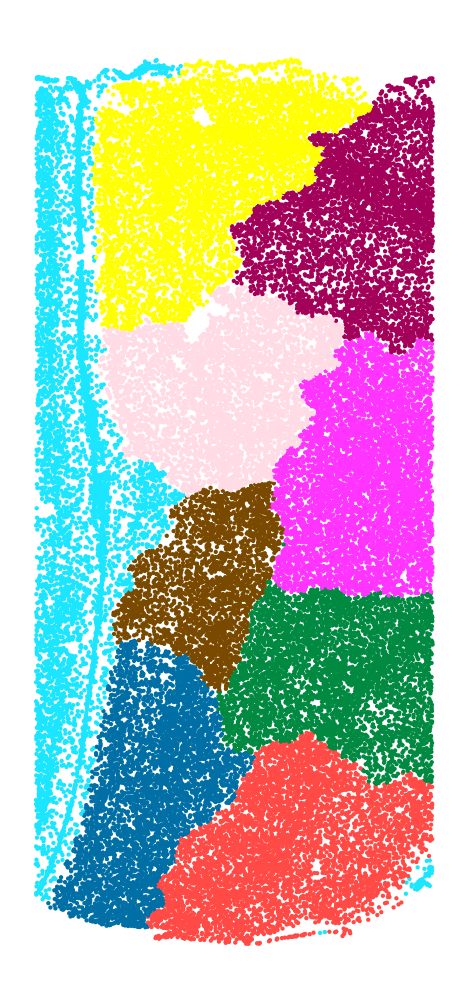

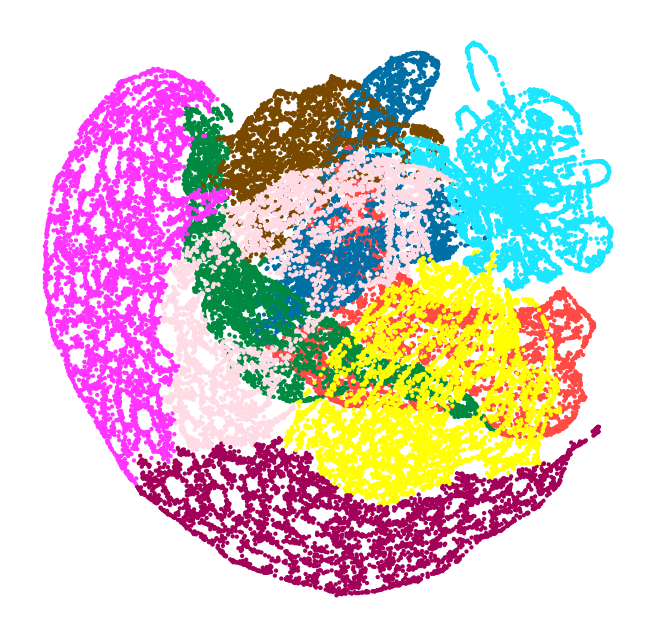

In [129]:
sc.set_figure_params(figsize=(3.5,8))
sc.pl.embedding(adata, basis='spatial', color='region', s=15, palette=sc.pl.palettes.default_102, legend_loc=None, return_fig=True, title='')
plt.axis('off')
figname = f'tissue_spin_leiden_50pcs_marmoset.png'
savepath = os.path.join(basepath, figname)
plt.savefig(savepath, bbox_inches='tight', transparent=True, dpi=dpi)

sc.set_figure_params(figsize=(5,5))
sc.pl.embedding(adata, basis='X_umap', color='region', s=15, palette=sc.pl.palettes.default_102, legend_loc=None, return_fig=True, title='')
plt.axis('off')
figname = f'umap_spin_leiden_50pcs_marmoset.png'
savepath = os.path.join(basepath, figname)
plt.savefig(savepath, bbox_inches='tight', transparent=True, dpi=dpi)

## 25 PCs

In [130]:
n_nbrs = 30
get_nbrs(adata, n_nbrs, 'spatial')
smooth(adata)

pca(adata, n_pcs=25)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, key_added='region', resolution=0.2)
sc.tl.umap(adata)

In [132]:
adata.obs['region']

0-marmoset         5
1-marmoset         5
2-marmoset         5
3-marmoset         5
4-marmoset         5
                  ..
42452-marmoset    10
42453-marmoset    10
42454-marmoset    15
42456-marmoset    15
42457-marmoset    10
Name: region, Length: 37717, dtype: category
Categories (18, object): ['0', '1', '2', '3', ..., '14', '15', '16', '17']

In [135]:
sc.tl.leiden(adata, key_added='region', resolution=0.08)
adata.obs['region']

0-marmoset        7
1-marmoset        7
2-marmoset        7
3-marmoset        7
4-marmoset        7
                 ..
42452-marmoset    1
42453-marmoset    1
42454-marmoset    8
42456-marmoset    8
42457-marmoset    1
Name: region, Length: 37717, dtype: category
Categories (9, object): ['0', '1', '2', '3', ..., '5', '6', '7', '8']

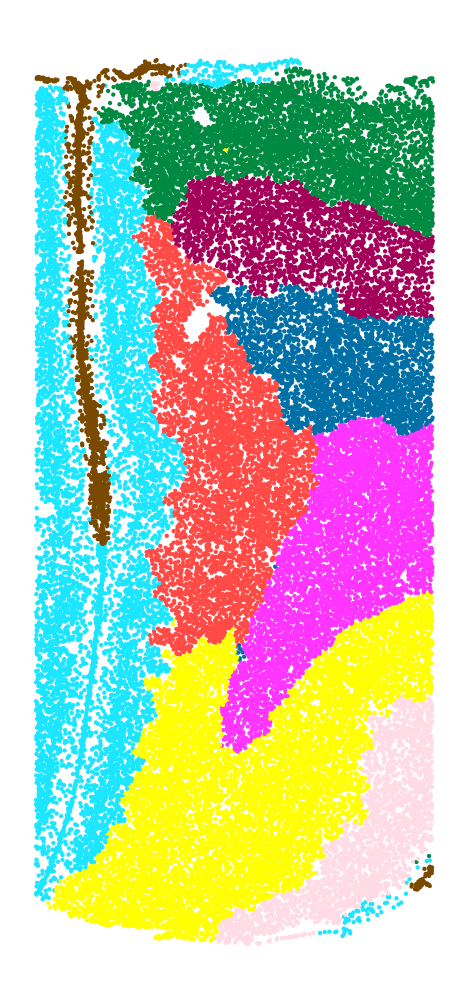

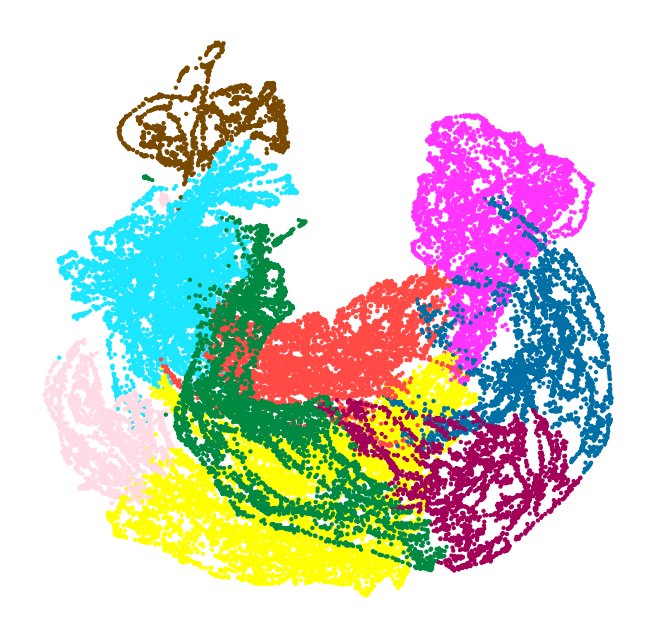

In [136]:
sc.set_figure_params(figsize=(3.5,8))
sc.pl.embedding(adata, basis='spatial', color='region', s=15, palette=sc.pl.palettes.default_102, legend_loc=None, return_fig=True, title='')
plt.axis('off')
figname = f'tissue_spin_leiden_25pcs_marmoset.png'
savepath = os.path.join(basepath, figname)
plt.savefig(savepath, bbox_inches='tight', transparent=True, dpi=dpi)

sc.set_figure_params(figsize=(5,5))
sc.pl.embedding(adata, basis='X_umap', color='region', s=15, palette=sc.pl.palettes.default_102, legend_loc=None, return_fig=True, title='')
plt.axis('off')
figname = f'umap_spin_leiden_25pcs_marmoset.png'
savepath = os.path.join(basepath, figname)
plt.savefig(savepath, bbox_inches='tight', transparent=True, dpi=dpi)

## 10 PCs

In [137]:
n_nbrs = 30
get_nbrs(adata, n_nbrs, 'spatial')
smooth(adata)

pca(adata, n_pcs=10)
sc.pp.neighbors(adata)
sc.tl.leiden(adata, key_added='region', resolution=0.2)
sc.tl.umap(adata)

In [138]:
adata.obs['region']

0-marmoset        0
1-marmoset        0
2-marmoset        0
3-marmoset        0
4-marmoset        0
                 ..
42452-marmoset    7
42453-marmoset    7
42454-marmoset    7
42456-marmoset    7
42457-marmoset    7
Name: region, Length: 37717, dtype: category
Categories (11, object): ['0', '1', '2', '3', ..., '7', '8', '9', '10']

In [140]:
sc.tl.leiden(adata, key_added='region', resolution=0.15)
adata.obs['region']

0-marmoset        0
1-marmoset        0
2-marmoset        0
3-marmoset        0
4-marmoset        0
                 ..
42452-marmoset    5
42453-marmoset    5
42454-marmoset    5
42456-marmoset    5
42457-marmoset    5
Name: region, Length: 37717, dtype: category
Categories (9, object): ['0', '1', '2', '3', ..., '5', '6', '7', '8']

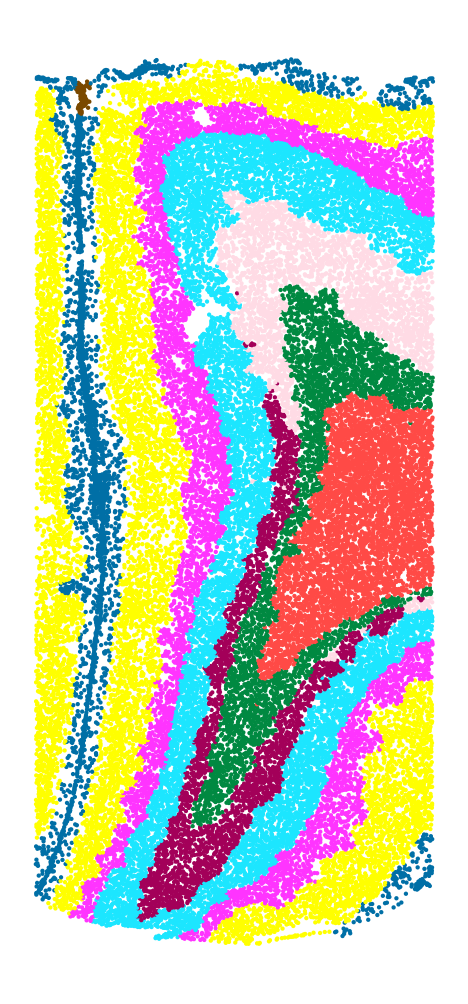

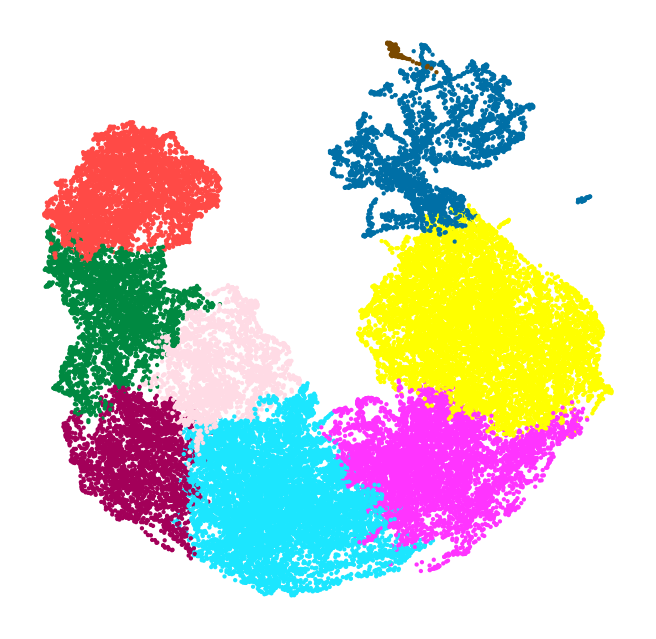

In [141]:
sc.set_figure_params(figsize=(3.5,8))
sc.pl.embedding(adata, basis='spatial', color='region', s=15, palette=sc.pl.palettes.default_102, legend_loc=None, return_fig=True, title='')
plt.axis('off')
figname = f'tissue_spin_leiden_10pcs_marmoset.png'
savepath = os.path.join(basepath, figname)
plt.savefig(savepath, bbox_inches='tight', transparent=True, dpi=dpi)

sc.set_figure_params(figsize=(5,5))
sc.pl.embedding(adata, basis='X_umap', color='region', s=15, palette=sc.pl.palettes.default_102, legend_loc=None, return_fig=True, title='')
plt.axis('off')
figname = f'umap_spin_leiden_10pcs_marmoset.png'
savepath = os.path.join(basepath, figname)
plt.savefig(savepath, bbox_inches='tight', transparent=True, dpi=dpi)

## SPIN

In [143]:
adata = spin.integrate(adata)
adata = spin.cluster(adata)

2023-04-26 22:59:07,445 - SPIN - INFO - Smoothing
2023-04-26 22:59:08,512 - SPIN - INFO - Performing PCA
2023-04-26 22:59:09,225 - SPIN - INFO - Finding latent neighbors
2023-04-26 22:59:17,235 - SPIN - INFO - Leiden clustering
2023-04-26 22:59:25,696 - SPIN - INFO - Performing UMAP
2023-04-26 23:00:23,923 - SPIN - INFO - Clustering complete


In [145]:
adata.obs['region']

0-marmoset        1
1-marmoset        1
2-marmoset        1
3-marmoset        1
4-marmoset        1
                 ..
42452-marmoset    5
42453-marmoset    5
42454-marmoset    5
42456-marmoset    5
42457-marmoset    5
Name: region, Length: 37717, dtype: category
Categories (7, object): ['0', '1', '2', '3', '4', '5', '6']

In [147]:
sc.tl.leiden(adata, neighbors_key='region', key_added='region', resolution=0.65)
adata.obs['region']

0-marmoset        0
1-marmoset        0
2-marmoset        0
3-marmoset        0
4-marmoset        0
                 ..
42452-marmoset    6
42453-marmoset    6
42454-marmoset    7
42456-marmoset    7
42457-marmoset    6
Name: region, Length: 37717, dtype: category
Categories (9, object): ['0', '1', '2', '3', ..., '5', '6', '7', '8']

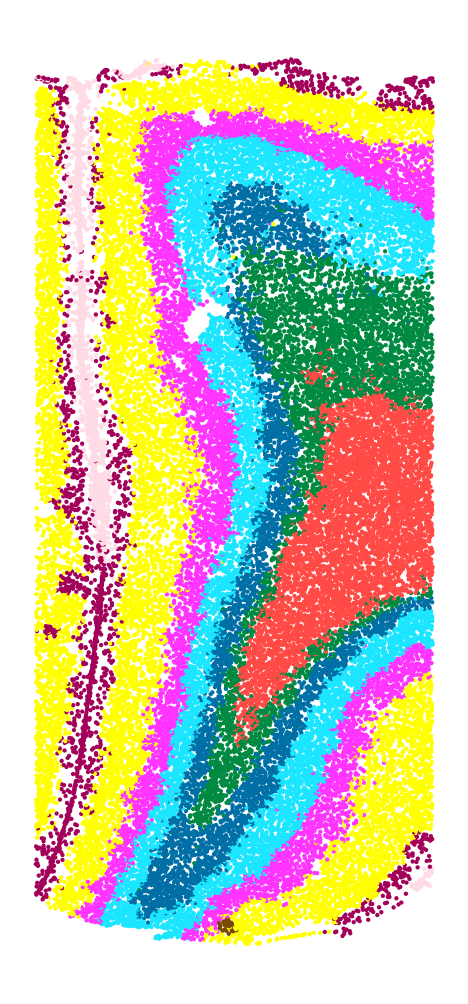

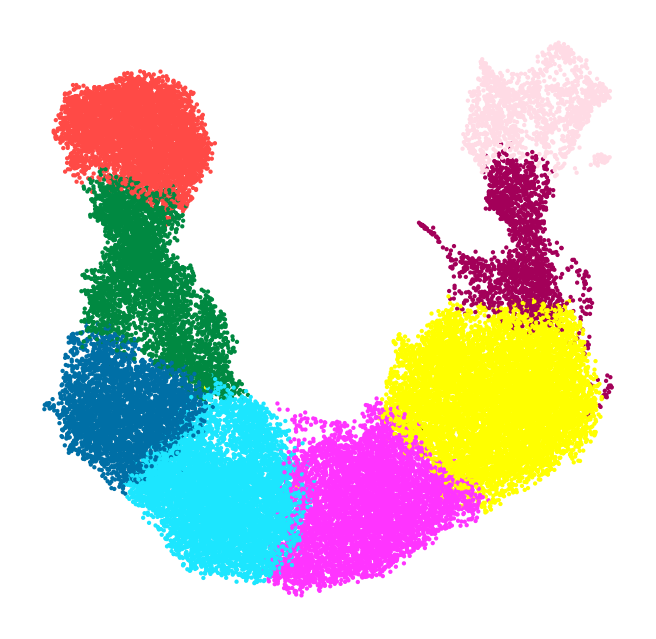

In [149]:
sc.set_figure_params(figsize=(3.5,8))
sc.pl.embedding(adata, basis='spatial', color='region', s=15, palette=sc.pl.palettes.default_102, legend_loc=None, return_fig=True, title='')
plt.axis('off')
figname = f'tissue_spin_leiden_marmoset.png'
savepath = os.path.join(basepath, figname)
plt.savefig(savepath, bbox_inches='tight', transparent=True, dpi=dpi)

sc.set_figure_params(figsize=(5,5))
sc.pl.embedding(adata, basis='X_umap_spin', color='region', s=15, palette=sc.pl.palettes.default_102, legend_loc=None, return_fig=True, title='')
plt.axis('off')
figname = f'umap_spin_leiden_marmoset.png'
savepath = os.path.join(basepath, figname)
plt.savefig(savepath, bbox_inches='tight', transparent=True, dpi=dpi)